# Chapter 8

## Question 11

Boosting on the `Caravan` data set

In [62]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection
import sklearn.ensemble
import sklearn.neighbors

In [2]:
caravan_dataset = sm.datasets.get_rdataset("Caravan", "ISLR").data

caravan_dataset.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


### (a) Create a training set consisting of 1000 observations, and a test set consisting of the rest.

In [9]:
X = caravan_dataset.drop(columns="Purchase")
y = caravan_dataset.Purchase
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=len(caravan_dataset)-1000)

### (b) Fit a boosting model of the training set with `Purchase` as the response. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [15]:
# I'm not convinced that learning_rate and shrinkage_rate are the same, here
boost_classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)
boost_classifier.fit(X_train, y_train)


              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4532
         Yes       0.00      0.00      0.00       290

    accuracy                           0.94      4822
   macro avg       0.47      0.50      0.48      4822
weighted avg       0.88      0.94      0.91      4822



/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Feature ranking:
1. MOPLLAAG: 0.16
2. PPERSAUT: 0.15
3. PWAPART: 0.07
4. MBERARBG: 0.07
5. MINK3045: 0.06
6. MSKB2: 0.05
7. MAUT0: 0.05
8. MINK7512: 0.05
9. MOSTYPE: 0.04
10. MGODPR: 0.04
11. MINKGEM: 0.04
12. MAUT1: 0.04
13. MSKD: 0.03
14. MBERZELF: 0.02
15. APERSAUT: 0.02
16. MGODGE: 0.02
17. MZPART: 0.02
18. MFALLEEN: 0.02
19. MZFONDS: 0.01
20. AMOTSCO: 0.01
21. MOSHOOFD: 0.01
22. MINKM30: 0.01
23. MGODRK: 0.01
24. PMOTSCO: 0.01
25. MRELGE: 0.00
26. MSKB1: 0.00
27. MBERBOER: 0.00
28. MBERMIDD: 0.00
29. MBERARBO: 0.00
30. MOPLHOOG: 0.00
31. MAANTHUI: 0.00
32. MRELSA: 0.00
33. MRELOV: 0.00
34. MGEMOMV: 0.00
35. MFGEKIND: 0.00
36. MFWEKIND: 0.00
37. MGEMLEEF: 0.00
38. MOPLMIDD: 0.00
39. MAUT2: 0.00
40. MGODOV: 0.00
41. MHKOOP: 0.00
42. MHHUUR: 0.00
43. MBERHOOG: 0.00
44. MSKC: 0.00
45. MINK4575: 0.00
46. MSKA: 0.00
47. ABYSTAND: 0.00
48. MINK123M: 0.00
49. ABROM: 0.00
50. AWABEDR: 0.00
51. AWALAND: 0.00
52. ABESAUT: 0.00
53. AVRAAUT: 0.00
54. AAANHANG: 0.00
55. ATRACTOR: 0.00
56. AWERK

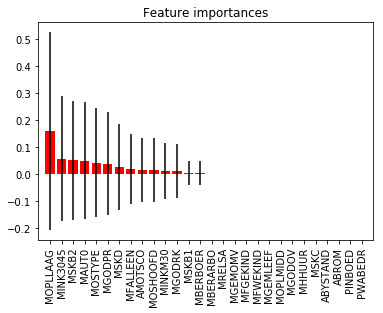

In [31]:
def getFeatureImportance(classifier, X):
    """Given a trained classifier, plot the feature importance"""
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    
    text_indices = [X.columns[i] for i in indices]
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print(f"{f+1}. {text_indices[f]}: {importances[indices[f]] :.2f}")

    # Plot the feature importances of the forest, not including zero-importance features
    plt.figure()
    plt.title("Feature importances")
    
    
    # Highly inefficient but obviously correct
    non_zero_indices = []
    non_zero_text_indices = []
    
    for index, text_index, importance in zip(indices, text_indices,importances):
        if abs(importance) > 0.001:
            non_zero_indices.append(index)
            non_zero_text_indices.append(text_index)
            
    
    plt.bar(range(len(non_zero_indices)), importances[non_zero_indices],
           color="r", yerr=std[non_zero_indices], align="center")
    plt.xticks(range(len(non_zero_indices)), non_zero_text_indices, rotation=90)
    plt.xlim([-1, len(non_zero_indices)])
    plt.show()

getFeatureImportance(boost_classifier, X)


### (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase actually make one? How does this compare with logistic regression or KNN?

In [57]:
probabilities = boost_classifier.predict_proba(X_test)
prediction_probability = 0.2
y_pred = [boost_classifier.classes_[1] if x[1] > prediction_probability else boost_classifier.classes_[0] for x in probabilities]

print(sklearn.metrics.confusion_matrix(y_test, y_pred))    

[[   0 4532]
 [   0  290]]


This is bad! We predict "Yes" every time!

In [60]:
number_of_predicted_yes = sum(x=="Yes" for x in y_pred)
fraction_of_yes_correct = sum(x == "Yes" and y == "Yes" for x,y in zip(y_pred, y_test))/number_of_predicted_yes
print(fraction_of_yes_correct)

0.06014102032351721


In [66]:
# KNN
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
probabilities = knn_model.predict_proba(X_test)
y_pred = [knn_model.classes_[1] if x[1] > prediction_probability else knn_model.classes_[0] for x in probabilities]

number_of_predicted_yes = sum(x=="Yes" for x in y_pred)
fraction_of_yes_correct = sum(x == "Yes" and y == "Yes" for x,y in zip(y_pred, y_test))/number_of_predicted_yes
print(fraction_of_yes_correct)

0.09467455621301775


In [67]:
# Logistic Regression
logistic_model = sklearn.linear_model.LogisticRegression()
logistic_model.fit(X_train, y_train)
probabilities = logistic_model.predict_proba(X_test)
y_pred = [logistic_model.classes_[1] if x[1] > prediction_probability else knn_model.classes_[0] for x in probabilities]

number_of_predicted_yes = sum(x=="Yes" for x in y_pred)
fraction_of_yes_correct = sum(x == "Yes" and y == "Yes" for x,y in zip(y_pred, y_test))/number_of_predicted_yes
print(fraction_of_yes_correct)

0.15436241610738255


/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
